# Task 1.1

In [2]:
from typing import Tuple
import torch
import torch.nn.functional as F

def gd_factorise_ad(A: torch.Tensor, rank: int, num_epochs=1000, lr=0.01) -> Tuple[torch.Tensor, torch.Tensor]:
    m, n = A.shape
    U = torch.rand((m, rank), requires_grad=True)
    V = torch.rand((n, rank), requires_grad=True)

    for epoch in range(num_epochs):
        
        U.grad, V.grad = None, None

        loss = F.mse_loss(A, U @ V.T, reduction='sum')

        loss.backward()

        U.data -= lr * U.grad
        V.data -= lr * V.grad

    return U, V


# Task 1.2

In [44]:
import pandas as pd

# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine−learning−databases' + '/iris/iris.data', header=None)
df = pd.read_csv('iris.data', header=None)
data = torch.tensor(df.iloc[:, [0,1,2,3]].values).float()
data = data - data.mean(dim=0)


In [30]:
U, V = gd_factorise_ad(data.float(), 2)
loss = F.mse_loss(data, U@V.T, reduction='sum')
print(f'MSE Loss: {loss}')

MSE Loss: 15.22886854506814


In [55]:
# truncated SVD
U2, S2, V2 = torch.svd(data)
S2[-2:] = 0
A2 = U2 @ torch.diag(S2) @ V2.T
loss2 = F.mse_loss(data, A2, reduction='sum')
print(f'MSE Loss: {loss2}')

MSE Loss: 15.22883415222168


# Task 1.3

TBC

In [37]:
import matplotlib.pyplot as plt

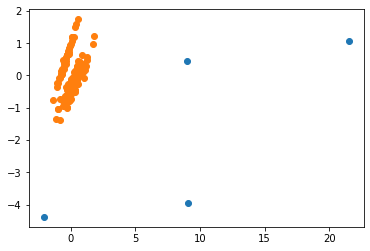

In [56]:
proj = data.T @ U2
proj = proj.detach().numpy()
plt.scatter(proj[:, 0], proj[:, 1])
plt.scatter(U.detach().numpy()[:, 0], U.detach().numpy()[:, 1])